In [1]:
import random
import pandas as pd

pct = [.01,.08,.12]
amounts = [1000, 2000, 3000]
charges = pd.DataFrame()

for i in range(0, 1000):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * .04 * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

for i in range(0, 10):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * random.choice(pct) * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

In [2]:
charges.head(10)

,Amount,Charge
0,3135.533256,121.236001
0,2909.785326,112.486454
0,1022.391622,39.188440
0,1999.624692,77.082703
0,964.233038,38.530034
0,966.940840,39.047600
0,2032.730258,78.796258
0,1047.062934,43.645214
0,2044.693752,80.069158
0,1934.047446,80.623492


In [3]:
charges.tail(10)

,Amount,Charge
0,2983.702532,236.501246
0,975.265827,10.114649
0,1013.206425,125.482688
0,965.745975,9.783096
0,1048.310808,79.933947
0,3051.684636,371.798351
0,1971.647332,233.740999
0,3092.198958,31.188062
0,1995.039226,228.614465
0,2019.450986,232.213240


In [4]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df=(charges-charges.mean())/charges.std()

clf.fit_predict(normalized_df)
results = clf.negative_outlier_factor_
charges['LOF'] = results.tolist()
charges['PCT'] = charges['Charge'] / charges['Amount']

/tmp/ipykernel_32/2645849241.py:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
/tmp/ipykernel_32/2645849241.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


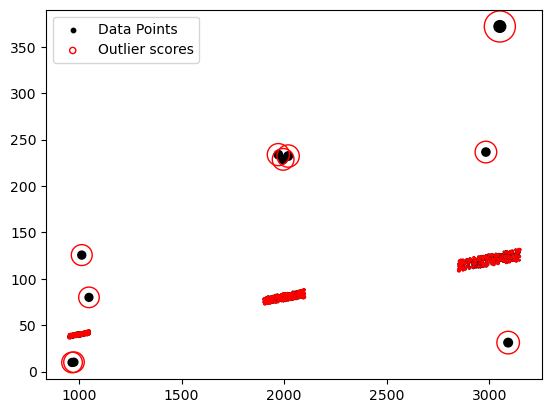

In [5]:
import matplotlib.pyplot as plt
plt.scatter(charges.Amount, charges.Charge, c='black', s=charges.LOF * -1,label="Data Points")
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(charges.Amount, charges.Charge, s=500 * radius,edgecolors="r",facecolors="none",label="Outlier scores",)
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()


In [6]:
charges.query('LOF < -1.5')

,Amount,Charge,LOF,PCT
0,2983.702532,236.501246,-35.110018,0.079264
0,975.265827,10.114649,-31.699131,0.010371
0,1013.206425,125.482688,-32.878102,0.123847
0,965.745975,9.783096,-32.056880,0.010130
0,1048.310808,79.933947,-31.852511,0.076250
0,3051.684636,371.798351,-71.457273,0.121834
0,1971.647332,233.740999,-36.599234,0.118551
0,3092.198958,31.188062,-38.198804,0.010086
0,1995.039226,228.614465,-35.213006,0.114591
0,2019.450986,232.213240,-37.323842,0.114988
